# Vizualization

## 1. Import 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (20,3)

## 2. Creating figures and axes

In [3]:
x = np.linspace(-4, 4, 100)
y = np.sin(x)

### 2.0. Get current ax and fig 

In [41]:
# ax = plt.gca()
# fig = plt.gcf()

### 2.1. Just plot

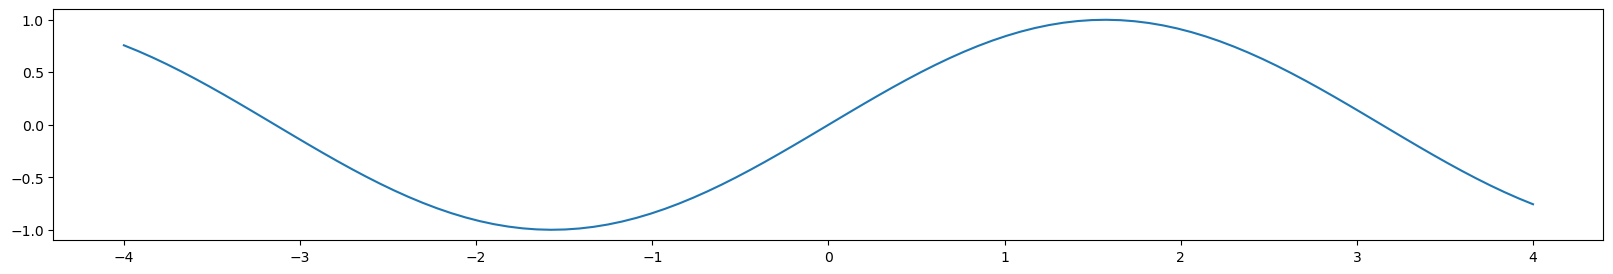

In [18]:
plt.plot(x, y);

### 2.2. Create figure 

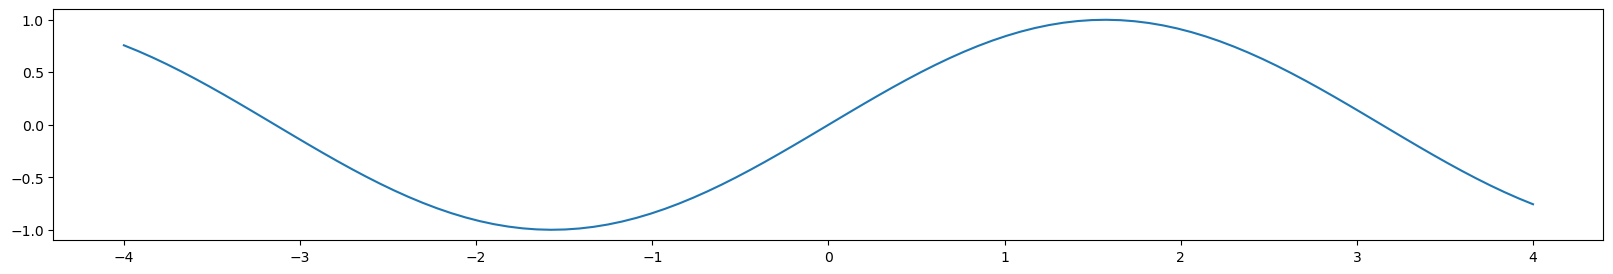

In [19]:
fig = plt.figure()
plt.plot(x,y);

### 2.3. Creating subplots

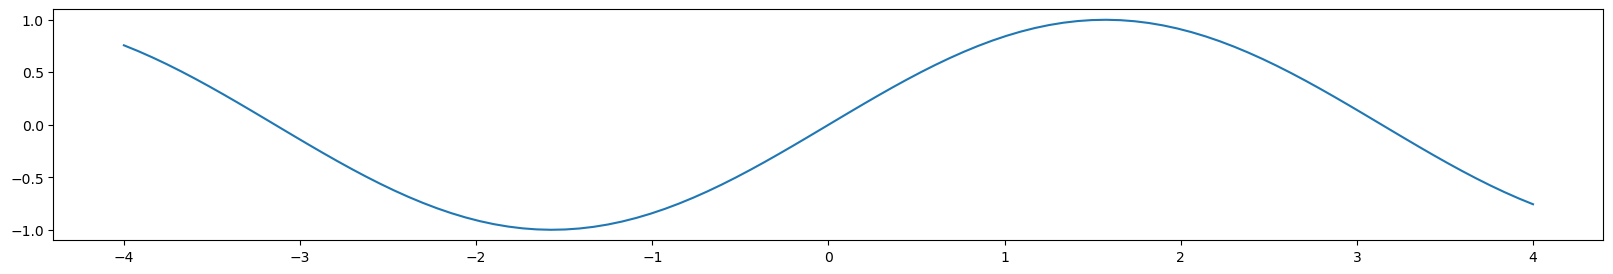

In [20]:
row = 1
col = 1
fig, ax = plt.subplots(row, col)
plt.plot(x,y);

#### Stateful interface

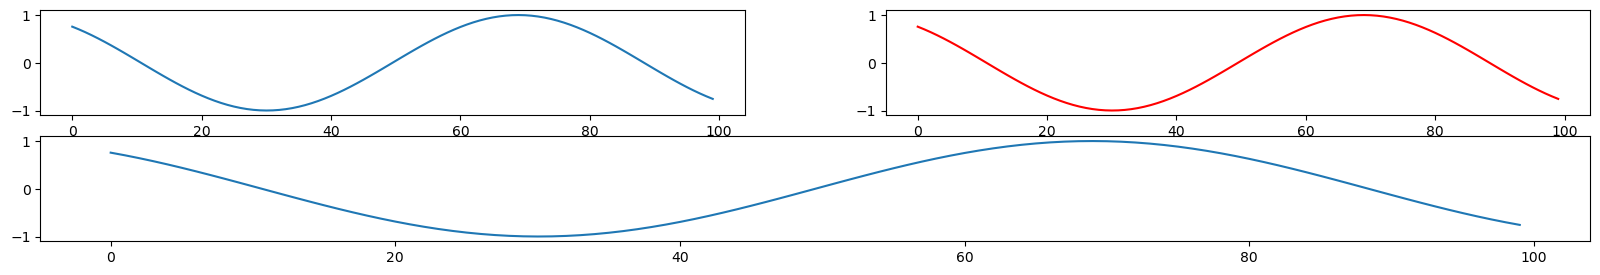

In [34]:
plt.subplot(2,2,1)
plt.plot(y)
plt.subplot(2,2,2)
plt.plot(y, c='r')
plt.subplot(2,1,2)
plt.plot(y);

You can change figure with functions:
- plt.title
- plt.xlim
- plt.ylim
- plt.xlabel
- plt.ylabel
- plt.xticks
- plt.yticks

#### Objected oriented interface

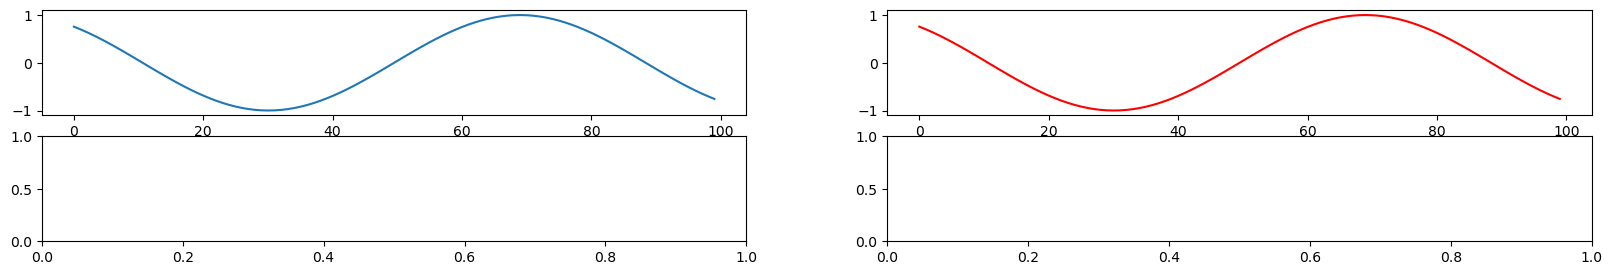

In [29]:
fig, axes = plt.subplots(2,2)
axes[0,0].plot(y)
axes[0,1].plot(y, c='r');

You can change figure with functions:
- ax.set_title
- ax.set_xlim
- ax.set_ylim
- ax.set_xlabel
- ax.set_ylabel
- ax.set_xticks
- ax.set_yticks
- ax.set_xtick_labels

## 3. Plotting commands

### 3.1. Plot

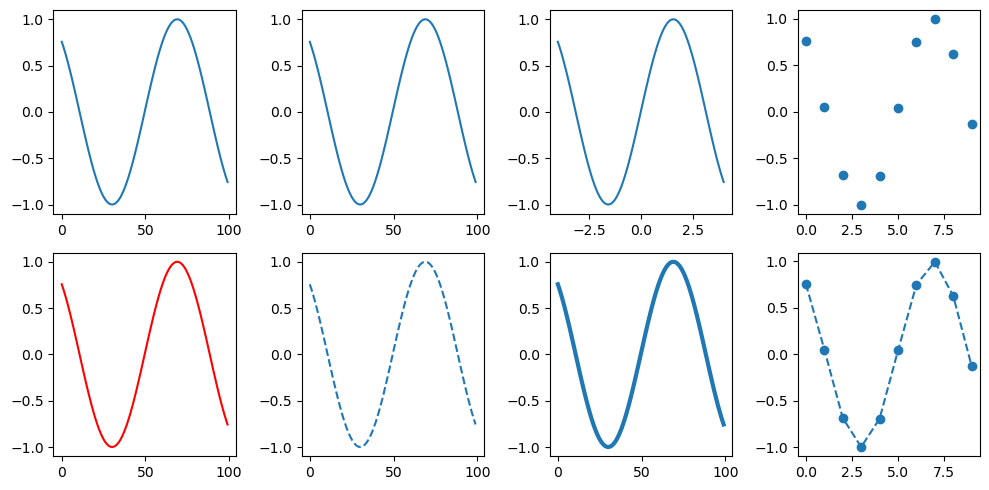

In [39]:
fig, axes = plt.subplots(2,4, figsize=(10,5))
axes[0,0].plot(y)
axes[0,1].plot(range(100), y) # same as above
axes[0,2].plot(np.linspace(-4, 4, 100), y)
axes[0,3].plot(y[::10], 'o')
axes[1,0].plot(y, c='r')
axes[1,1].plot(y, '--')
axes[1,2].plot(y, lw=3)
axes[1,3].plot(y[::10], '--o')
plt.tight_layout()

### 3.2. Scatter

In [6]:
mu_first = [0, 0]
cov_first = [[1, 2], [1/6, 2]]

x,y = np.random.multivariate_normal(mu_first, cov_first, 100).T
sizes = np.random.randint(20,50,100)

C:\Users\Misha\AppData\Local\Temp\ipykernel_19820\1306324448.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  x,y = np.random.multivariate_normal(mu_first, cov_first, 100).T


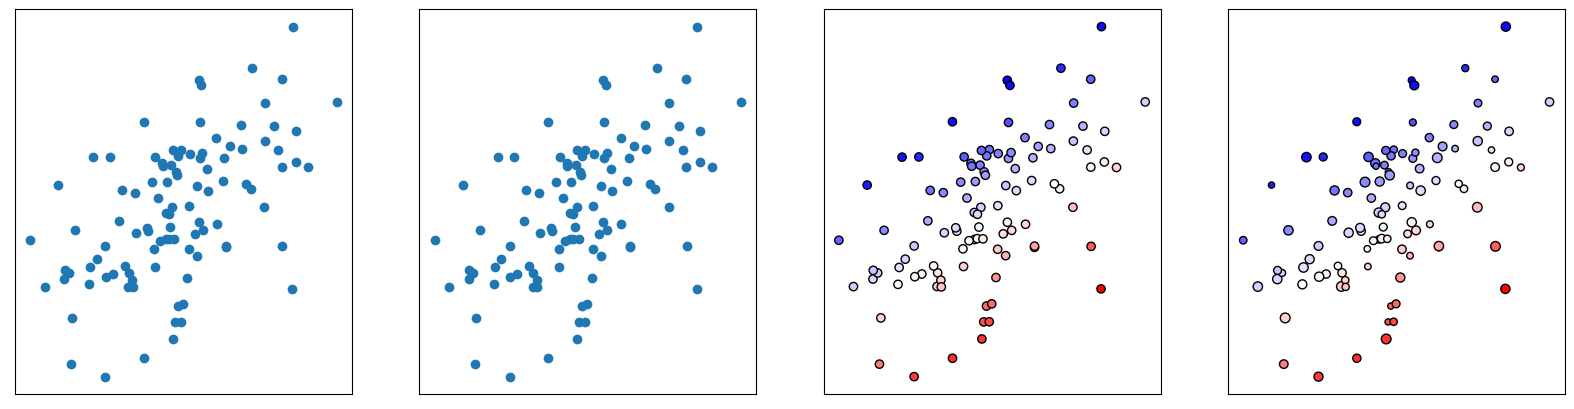

In [7]:
fig, axes = plt.subplots(1,4, figsize=(20,5),
                         subplot_kw={'xticks':(), 'yticks':()})
axes[0].plot(x, y, 'o')
axes[1].scatter(x, y)
axes[2].scatter(x, y, c=x-y, cmap='bwr', edgecolor='k')
axes[3].scatter(x, y, c=x-y, s=sizes, cmap='bwr', edgecolor='k');

### 3.3. Histogram

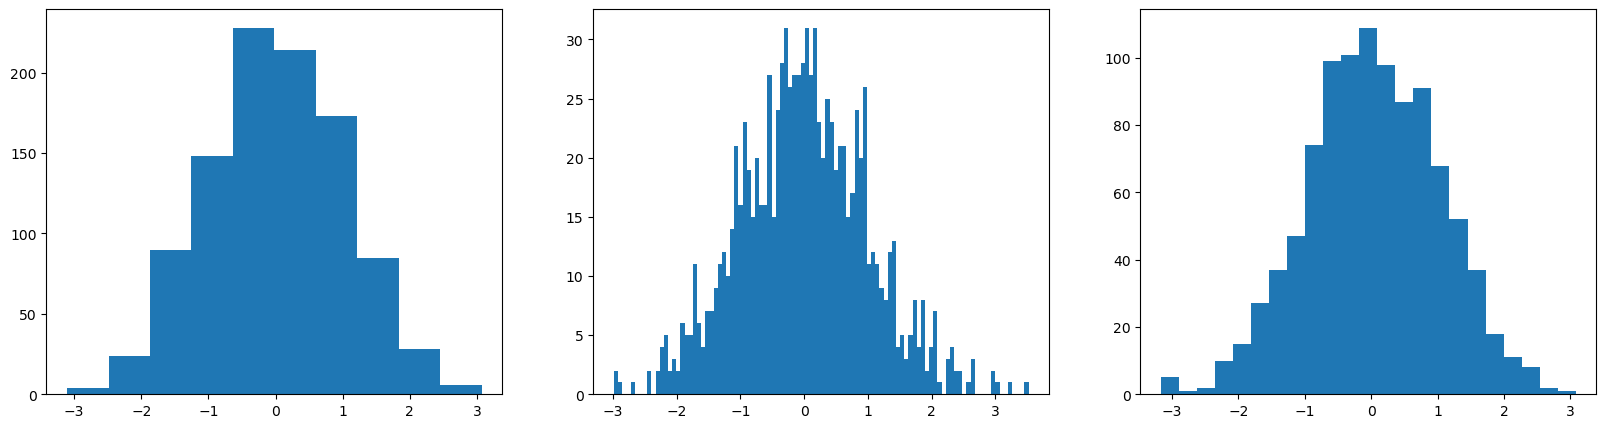

In [124]:
fig, axes = plt.subplots(1,3, figsize=(20,5),)
axes[0].hist(np.random.normal(size=1000))
axes[1].hist(np.random.normal(size=1000), bins=100)
axes[2].hist(np.random.normal(size=1000), bins='auto');

### 3.4. Bar plot

In [21]:
plt.rcParams["figure.figsize"] = (20,4)

In [34]:
words = ['a', 'AAA', 'AAAS', 'aardvark', 'Aarhus', 'Aaron', 'ABA', 'Ababa','aback', 'abacus', 'abalone', 'abandon', 'abase', 'abash', 'abate',
         'abbas', 'abbe', 'abbey', 'abbot', 'Abbott', 'abbreviate']
x = np.random.randint(20,200,len(words))

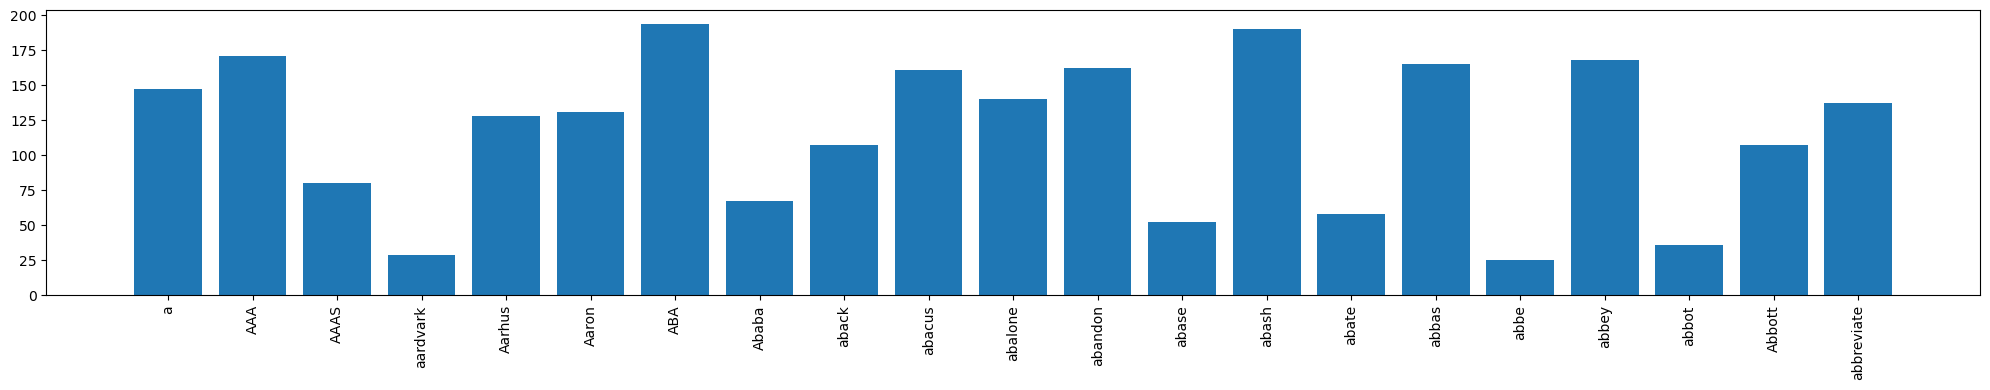

In [36]:
plt.bar(range(len(words)), x)
plt.xticks(range(len(words)), words, rotation=90)
plt.tight_layout();

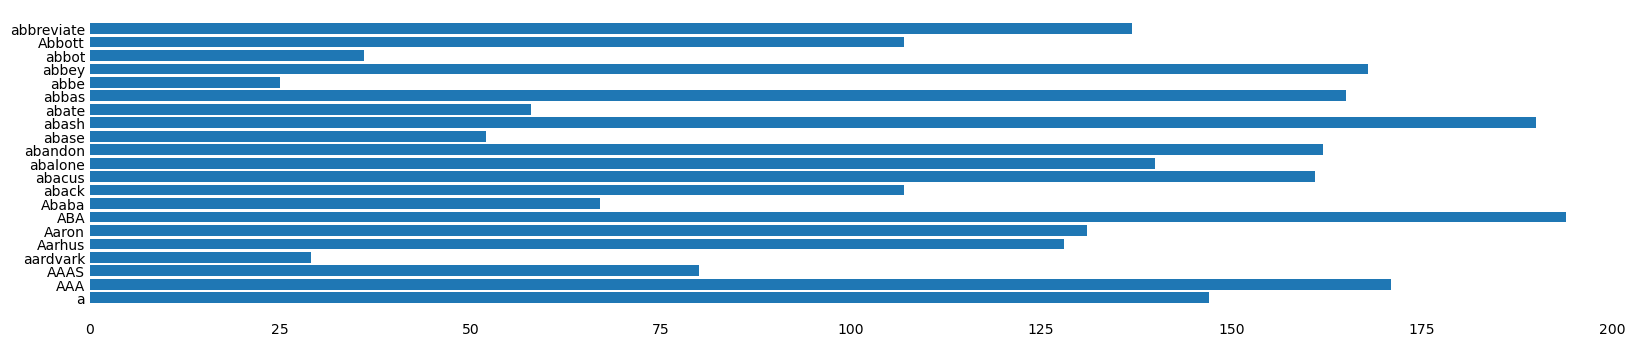

In [42]:
# it's better
plt.barh(range(len(words)), x)
plt.yticks(range(len(words)), words, fontsize=10)
ax = plt.gca()
ax.set_frame_on(False)
ax.tick_params(length=0)

### 3.5. Heatmap

In [66]:
dx, dy = 0.25, 0.25
y, x = np.mgrid[slice(-2, 2 + dy, dy),
                slice(-2, 2 + dx, dx)]
z = (1 - x / 3. + x ** 5 + y ** 5) * np.exp(-x ** 2 - y ** 2)
z = z[:-1, :-1]

Difference between plots:
- 00 default plot with true data
- 01 is prettier but it's not true data
- 10 with this colormap difficult to understand where is background or zero values
- 11 easily can understand where is zero

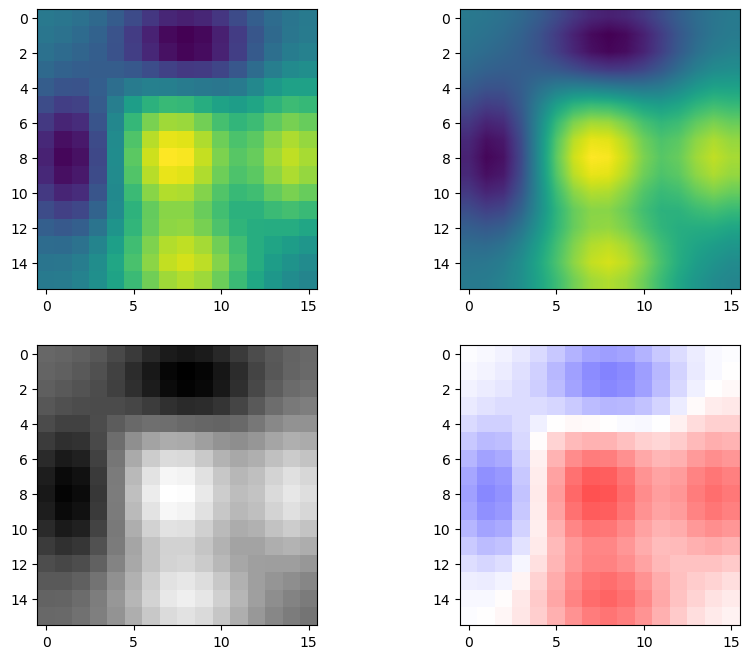

In [72]:
fig, ax = plt.subplots(2,2, figsize=(10,8),)
im1 = ax[0,0].imshow(z)
im2 = ax[0,1].imshow(z, interpolation='bilinear')
im3 = ax[1,0].imshow(z, cmap='gray')
im4 = ax[1,1].imshow(z, cmap='bwr', vmin=-1.5, vmax=1.5)
# axes[0].hist(np.random.normal(size=1000))
# axes[1].hist(np.random.normal(size=1000), bins=100)
# axes[2].hist(np.random.normal(size=1000), bins='auto');

## 4. Problem of overlapping

In [259]:
mu_first = [0, 0]
cov_first1 = [[0, 0.1], 
             [0, 0.1]]
cov_first2 = [[0.1, 0], 
             [0.1, 0]]
cov_first3 = [[0.3, 0.5], 
              [0.1, 0.2]]

x1,y1 = np.random.multivariate_normal(mu_first, cov_first1, 1000).T
x2,y2 = np.random.multivariate_normal(mu_first, cov_first2, 1000).T
x3,y3 = np.random.multivariate_normal(mu_first, cov_first3, 10000).T
x = np.concatenate([x1, x2, x3])
y = np.concatenate([y1, y2, y3])

C:\Users\Misha\AppData\Local\Temp\ipykernel_19820\3320782265.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  x1,y1 = np.random.multivariate_normal(mu_first, cov_first1, 1000).T
C:\Users\Misha\AppData\Local\Temp\ipykernel_19820\3320782265.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  x2,y2 = np.random.multivariate_normal(mu_first, cov_first2, 1000).T
C:\Users\Misha\AppData\Local\Temp\ipykernel_19820\3320782265.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  x3,y3 = np.random.multivariate_normal(mu_first, cov_first3, 10000).T


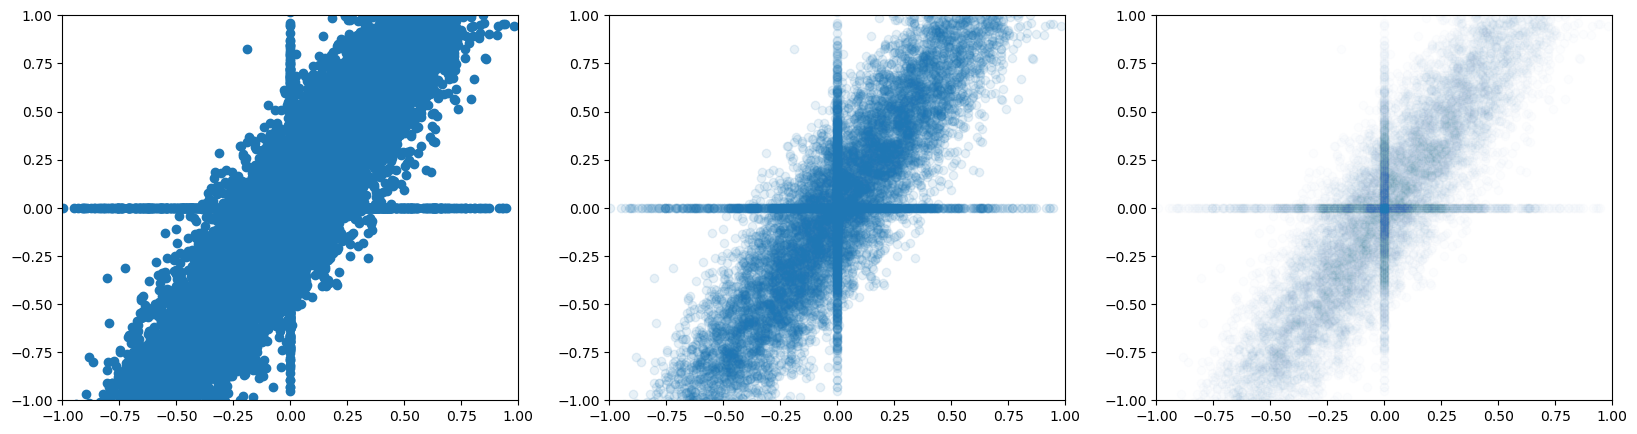

In [260]:
fig, axes = plt.subplots(1,3, figsize=(20,5),
                         subplot_kw={'xlim':(-1,1), 'ylim':(-1,1)})
axes[0].scatter(x, y)
axes[1].scatter(x, y, alpha=.1)
axes[2].scatter(x, y, alpha=.01);

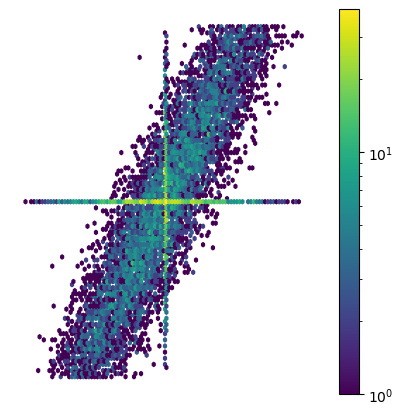

In [263]:
plt.figure(figsize=(5,5))
plt.hexbin(x, y, bins='log', extent=(-1, 1,-1,1))
plt.colorbar()
plt.axis('off');